# JAX: A High-Performance Python Library

Jax is a python library developed and used by Google Research that can run numpy-like code fast using its compiler and can run on a GPU with very few changes to your code.  It also can automatically compute the gradient of functions.

This article on the [JAX Ecosystem](https://moocaholic.medium.com/jax-a13e83f49897) by Grigory Sapunov is a nice overview of jax and what it is being used for.

The [JAX reference documentation](https://jax.readthedocs.io/en/latest/index.html) will be useful, too.

## Installing

Commands I used to install jax in my anaconda distribution are the following:

      pip install --upgrade jax
      pip install --upgrade "jax[cuda111]" -f https://storage.googleapis.com/jax-release.html

      export PATH=$PATH:/usr/local/cuda/11.1/bin
      
This is on my CS account.  I believe the steps are similar to how I installed it on my Ubuntu laptop.

## From Numpy to Jax

Many `numpy` functions work just the same in `jax`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

import jax.numpy as jnp
import jax

In [2]:
jax.config.update('jax_platform_name', 'cpu')
jax.config.update('jax_enable_x64', True)

In [3]:
n = 5
X = np.random.normal(size=(n, n))
X

array([[-0.86842435,  0.07251397, -1.00067794,  0.64862202,  0.80116939],
       [-0.72896477,  0.24884546,  0.72136096,  0.19651249,  0.1804235 ],
       [-2.69959053,  0.61238652,  0.2765071 , -0.40131859,  0.14029839],
       [ 0.08088674, -1.34902094,  0.51235621, -0.02044564,  0.38915856],
       [ 1.75789203, -0.36995633, -0.63577302,  0.13556901,  0.19991364]])

In [4]:
type(X)

numpy.ndarray

In [5]:
key = jax.random.PRNGKey(0)
Xj = jax.random.normal(key, shape=(n, n), dtype=jnp.float64)
Xj

DeviceArray([[-1.94963384e-01, -1.22714659e+00, -9.17790208e-01,
               1.45208933e-01,  1.81519776e-03],
             [-7.49586842e-01, -8.02633400e-01,  1.22429120e-01,
              -1.75889952e-01,  1.05807414e+00],
             [-2.44926166e-01, -7.76449818e-01,  4.07351856e-01,
               5.34739321e-01, -1.35932526e+00],
             [-2.18004277e+00, -2.71964285e-01,  1.36571531e+00,
               3.09982098e-01,  3.47224140e-01],
             [-3.68758371e-01,  2.74834294e-01,  1.21677907e+00,
              -2.98193408e-01, -1.75672736e+00]], dtype=float64)

In [6]:
Xj = jnp.array(X)
Xj

DeviceArray([[-0.86842435,  0.07251397, -1.00067794,  0.64862202,
               0.80116939],
             [-0.72896477,  0.24884546,  0.72136096,  0.19651249,
               0.1804235 ],
             [-2.69959053,  0.61238652,  0.2765071 , -0.40131859,
               0.14029839],
             [ 0.08088674, -1.34902094,  0.51235621, -0.02044564,
               0.38915856],
             [ 1.75789203, -0.36995633, -0.63577302,  0.13556901,
               0.19991364]], dtype=float64)

In [7]:
Xj

DeviceArray([[-0.86842435,  0.07251397, -1.00067794,  0.64862202,
               0.80116939],
             [-0.72896477,  0.24884546,  0.72136096,  0.19651249,
               0.1804235 ],
             [-2.69959053,  0.61238652,  0.2765071 , -0.40131859,
               0.14029839],
             [ 0.08088674, -1.34902094,  0.51235621, -0.02044564,
               0.38915856],
             [ 1.75789203, -0.36995633, -0.63577302,  0.13556901,
               0.19991364]], dtype=float64)

In [8]:
type(Xj)

jaxlib.xla_extension.DeviceArray

In [9]:
X.dtype, Xj.dtype

(dtype('float64'), dtype('float64'))

In [10]:
Xj.device().device_kind

'cpu'

In [11]:
X @ X.T

array([[ 2.82335838,  0.20125764,  1.96420089, -0.38225001, -0.66912149],
       [ 0.20125764,  1.18484513,  2.26620643,  0.04112796, -1.76941503],
       [ 1.96420089,  2.26620643,  7.92000272, -0.84000966, -5.17429952],
       [-0.38225001,  0.04112796, -0.84000966,  2.24077147,  0.39055305],
       [-0.66912149, -1.76941503, -5.17429952,  0.39055305,  3.68960384]])

In [12]:
Xj @ Xj.T

DeviceArray([[ 2.82335838,  0.20125764,  1.96420089, -0.38225001,
              -0.66912149],
             [ 0.20125764,  1.18484513,  2.26620643,  0.04112796,
              -1.76941503],
             [ 1.96420089,  2.26620643,  7.92000272, -0.84000966,
              -5.17429952],
             [-0.38225001,  0.04112796, -0.84000966,  2.24077147,
               0.39055305],
             [-0.66912149, -1.76941503, -5.17429952,  0.39055305,
               3.68960384]], dtype=float64)

Is jax any faster at this matrix multiplication?

In [13]:
%timeit X @ X.T

1.95 µs ± 8.62 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [14]:
%timeit Xj @ Xj.T

77.4 µs ± 696 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Disappointed?

In [15]:
n = 6000
X = np.random.normal(size=(n, n)) # .astype('float32')
Xj = jnp.array(X)  #jax.random.normal(key, shape=(n, n), dtype=jnp.float64)

In [16]:
X.dtype, Xj.dtype

(dtype('float64'), dtype('float64'))

In [17]:
def mult(A):
    return A @ A.T

In [18]:
print('numpy', X.dtype)
%timeit mult(X)
print('jax.numpy', Xj.dtype)
%timeit mult(Xj)
print('jax.numpy', Xj.dtype)
%timeit mult(Xj).block_until_ready()

numpy float64
843 ms ± 1.42 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
jax.numpy float64
3.2 s ± 14.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
jax.numpy float64
3.18 s ± 21.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [19]:
X = X.astype(np.float32)
Xj = Xj.astype(jnp.float32)

print('numpy', X.dtype)
%timeit mult(X)
print('jax.numpy', Xj.dtype)
%timeit mult(Xj)

numpy float32
450 ms ± 8.14 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
jax.numpy float32
860 ms ± 12.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [20]:
list(range(0, 100, 10))

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90]

## Compiling

In [21]:
mult_jit = jax.jit(mult)
mult_jit(Xj).block_until_ready()  # run once for the compilation to be 

DeviceArray([[6014.0747  ,  -27.343468,   68.510345, ...,   75.47126 ,
               -32.9019  ,   11.829111],
             [ -27.343468, 6011.7905  ,  -20.519217, ..., -133.51108 ,
               -24.997894, -164.62572 ],
             [  68.510345,  -20.519217, 6195.5015  , ..., -118.14404 ,
                56.93265 ,  -59.66047 ],
             ...,
             [  75.47126 , -133.51108 , -118.14404 , ..., 5946.798   ,
                44.16239 ,  -16.977594],
             [ -32.9019  ,  -24.997894,   56.93265 , ...,   44.16239 ,
              5912.4473  ,   62.393394],
             [  11.829111, -164.62572 ,  -59.66047 , ...,  -16.977594,
                62.393394, 6207.6216  ]], dtype=float32)

In [22]:
n = 6000
X = np.random.normal(size=(n, n)) # .astype('float32')
Xj = jnp.array(X)  #jax.random.normal(key, shape=(n, n), dtype=jnp.float64)

In [23]:
X.dtype, Xj.dtype

(dtype('float64'), dtype('float64'))

In [24]:
print('numpy', X.dtype)
%timeit mult(X)
print('jax.numpy', Xj.dtype)
%timeit mult(Xj)
print('jax.numpy jit', Xj.dtype)
%timeit mult_jit(Xj)

numpy float64
864 ms ± 23.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
jax.numpy float64
3.19 s ± 20.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
jax.numpy jit float64
3.1 s ± 40 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [25]:
X = X.astype(np.float32)
Xj = Xj.astype(jnp.float32)

print('numpy', X.dtype)
%timeit mult(X)
print('jax.numpy', Xj.dtype)
%timeit mult(Xj)
print('jax.numpy jit', Xj.dtype)
%timeit mult_jit(Xj)

numpy float32
446 ms ± 5.46 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
jax.numpy float32
855 ms ± 6.44 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
jax.numpy jit float32
841 ms ± 8.87 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [26]:
import time

result = []

for n in range(0, 10000, 1000):
    X = np.random.normal(size=(n, n)).astype(np.float64)
    Xj = jnp.array(X).astype(jnp.float64)
    
    start_time = time.time()
    mult(X)
    np_time64 = time.time() - start_time

    start_time = time.time()
    mult(Xj)
    jnp_time64 = time.time() - start_time

    start_time = time.time()
    mult_jit(Xj)
    jnp_jit_time64 = time.time() - start_time
        
    X = X.astype(np.float32)
    Xj = Xj.astype(jnp.float32)
    
    start_time = time.time()
    mult(X)
    np_time32 = time.time() - start_time
    
    start_time = time.time()
    mult(Xj)
    jnp_time32 = time.time() - start_time

    start_time = time.time()
    mult_jit(Xj)
    jnp_jit_time32 = time.time() - start_time

    result.append([n, np_time64, jnp_time64, jnp_jit_time64, np_time32, jnp_time32, jnp_jit_time32])

<IPython.core.display.Javascript object>


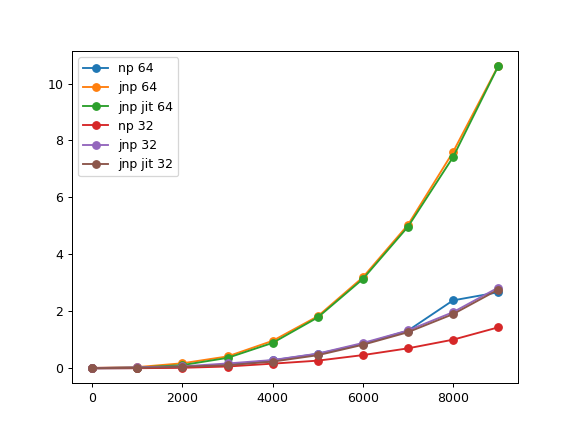

In [27]:
result = np.array(result)
plt.figure()
plt.plot(result[:, 0], result[:, 1:], 'o-', label=('np 64', 'jnp 64', 'jnp jit 64',
                                                   'np 32', 'jnp 32', 'jnp jit 32'))
plt.legend();

## JAX: The Sharp Bits

This article on [The Sharp Bits](https://jax.readthedocs.io/en/latest/notebooks/Common_Gotchas_in_JAX.html) will be helpful when you run into issues with Jax.

## Running on  a GPU

For the following config.update to have an effect, we just restart the kernel and jump down to this cell to start executing.

In [32]:
!cat cuda_machines

rock          
paper         
scissors      
earth         
jupiter       
mars          
mercury       
neptune       
saturn        
uranus        
venus         
winter-park   
wolf-creek    
lamborghini   
lotus         
maserati      
porsche       
bentley       
bugatti       
ferrari       
jaguar        
ahsoka        
anakin        
boba          
bo-katan      
chopper       
clan-wren     
ezra          
grogu         
hera          
hondo         
kallus        
kanan         
kuiil         
loth-cats     
mando         
nightsisters  
obi-wan       
omega         
palpatine     
rex           
sabine        
satine        
tarkin        
thrawn        
ventress      
zeb           
anchovy       
barracuda     
blowfish      
bonito        
brill         
bullhead      
char          
cod           
dorado        
eel           
flounder      
grouper       
halibut       
herring       
mackerel      
marlin        
perch         
pollock       
sardine       
shark     

In [34]:
!gpustatus -f cuda_machines


connecting to rock!
rock has 4 NVIDIA GeForce RTX 3090
---------------------------------------
Username:        paahuni
GPU's used:      1
Memory used:     23763 MiB

connecting to paper!
paper currently has no running gpu processes

connecting to scissors!
scissors currently has no running gpu processes

connecting to earth!
earth currently has no running gpu processes

connecting to jupiter!
jupiter currently has no running gpu processes

connecting to mars!
mars currently has no running gpu processes

connecting to mercury!
mercury currently has no running gpu processes

connecting to neptune!
neptune currently has no running gpu processes

connecting to saturn!
saturn currently has no running gpu processes

connecting to uranus!
uranus currently has no running gpu processes

connecting to venus!
venus currently has no running gpu processes

connecting to winter-park!
winter-park currently has no running gpu processes

connecting to wolf-creek!
wolf-creek currently has no running g

In [35]:
!nvidia-smi

Wed Oct  5 14:59:24 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 515.76       Driver Version: 515.76       CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA TITAN Xp     Off  | 00000000:02:00.0 Off |                  N/A |
| 23%   31C    P8    11W / 250W |    155MiB / 12288MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

import time

import jax.numpy as jnp
import jax

jax.config.update('jax_platform_name', 'gpu')

In [10]:
n = 6000
X = np.random.normal(size=(n, n)).astype(np.float64)
Xj = jnp.array(X).astype(jnp.float64)
    

/s/parsons/e/fac/anderson/anaconda3/lib/python3.8/site-packages/jax/_src/numpy/lax_numpy.py:6493: UserWarning: Explicitly requested dtype <class 'jax._src.numpy.lax_numpy.float64'> requested in astype is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  lax._check_user_dtype_supported(dtype, "astype")


In [11]:
n = 6000
X = np.random.normal(size=(n, n)).astype(np.float32)
Xj = jnp.array(X).astype(jnp.float32)
    

In [12]:
Xj.device().device_kind

'NVIDIA TITAN Xp'

In [13]:
def mult(A):
    return A @ A.T

mult_jit = jax.jit(mult)
mult_jit(Xj).block_until_ready()  # run once for the compilation to be 

DeviceArray([[5894.8154  ,    9.276456,  -34.275887, ...,  162.0266  ,
               116.03706 ,   74.5138  ],
             [   9.276456, 6009.996   ,  -90.11747 , ...,  -32.208763,
                72.66892 ,   37.029938],
             [ -34.275887,  -90.11747 , 6081.0815  , ...,   30.498875,
                66.59144 ,  -18.497673],
             ...,
             [ 162.0266  ,  -32.208763,   30.498875, ..., 5863.248   ,
               119.82856 ,   16.899933],
             [ 116.03706 ,   72.66892 ,   66.59144 , ...,  119.82856 ,
              5923.2773  ,  -66.758606],
             [  74.5138  ,   37.029938,  -18.497673, ...,   16.899933,
               -66.758606, 5978.782   ]], dtype=float32)

In [14]:
result = []

for n in range(0, 10000, 1000):
    X = np.random.normal(size=(n, n)).astype(np.float32)
    Xj = jnp.array(X).astype(jnp.float32)

    start_time = time.time()
    mult(X)
    np_time32 = time.time() - start_time
    
    mult(Xj).block_until_ready()
    
    start_time = time.time()
    mult(Xj).block_until_ready()
    jnp_time32 = time.time() - start_time

    mult_jit(Xj).block_until_ready()
    
    start_time = time.time()
    mult_jit(Xj).block_until_ready()
    jnp_jit_time32 = time.time() - start_time

    
    result.append([n, np_time32, jnp_time32, jnp_jit_time32])

<IPython.core.display.Javascript object>


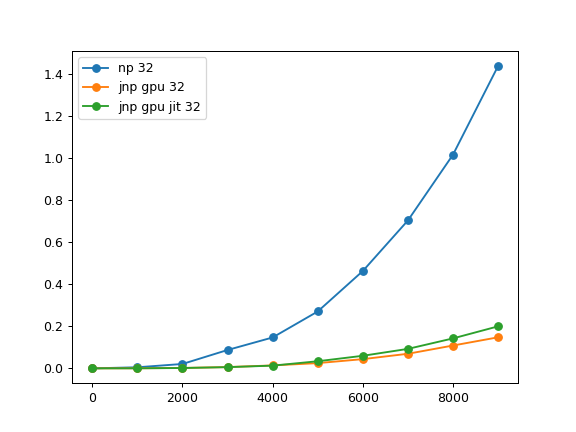

In [15]:
result = np.array(result)
plt.figure()
plt.plot(result[:, 0], result[:, 1:], 'o-', label=('np 32', 'jnp gpu 32', 'jnp gpu jit 32'))
plt.legend();

## How about some Neural Network code?

Again, restart kernel and jump to this code cell to start.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

import time

import jax
import jax.numpy as jnp

jax.config.update('jax_platform_name', 'cpu')

In [2]:
def init_weights():
    return[np.random.uniform(-1.0, 1.0, size=(4, 10)) / np.sqrt(4),
           np.random.uniform(-1.0, 1.0, size=(11, 1)) / np.sqrt(11)]

def nnet(Ws, X):
    Z = np.tanh(X @ Ws[0][1:, :] + Ws[0][0:1, :])
    Y = Z @ Ws[1][1:, :] + Ws[1][0:1, :]
    return Z, Y

def mse(Ws, X, T):
    _, Y = nnet(Ws, X)
    return np.mean((Y - T)**2)

def mse_grad_def(Ws, X, T):
    Z, Y = nnet(Ws, X)
    n_samples, n_outputs = T.shape
    D = -(T - Y) / (n_samples * n_outputs)
    gradients = [np.vstack((np.sum(D, axis=0), Z.T @ D))]
    D = D @ Ws[1][1:, :].T * (1 - Z ** 2)
    gradients = [np.vstack((np.sum(D, axis=0), X.T @ D))] + gradients
    return gradients

In [3]:
X = np.arange(60000).reshape((20000, 3)).astype(np.float32)
T = X[:, 0:1] / 100  #  * X[:, 1:2] / 10000

def train(X, T, Ws, n_updates, learning_rate, gf):
    for update_i in range(n_updates):
        gradients = gf(Ws, X, T)
        for W, grad in zip(Ws, gradients):
            W[:] = W - learning_rate * grad  # W -= learning_rate * grad did not work.
    # print(np.hstack((T, nnet(Ws, X)[1])))

Ws = init_weights()
start = time.time()
train(X, T, Ws, 1000, 0.01, mse_grad_def)
print('train took', time.time() - start, 'seconds')

train took 4.439160108566284 seconds


<IPython.core.display.Javascript object>


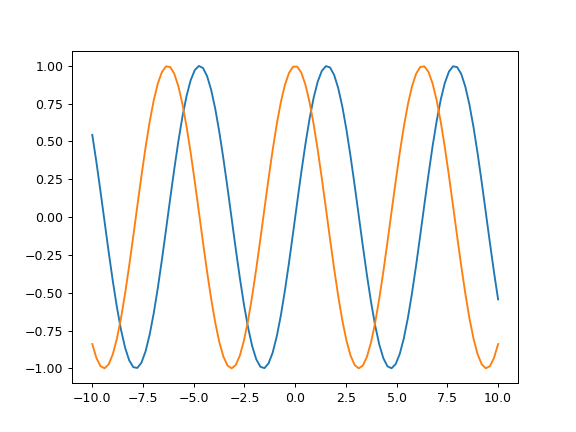

In [4]:
def f(x):
    return jnp.sin(x)

xs = jnp.linspace(-10, 10, 100)
plt.plot(xs, f(xs))

df = jax.grad(f)
plt.plot(xs, [df(x) for x in xs]);

In [5]:
def jnnet(Ws, X):
    Z = jnp.tanh(X @ Ws[0][1:, :] + Ws[0][0:1, :])
    Y = Z @ Ws[1][1:, :] + Ws[1][0:1, :]
    return Z, Y

def jmse(Ws, X, T):
    _, Y = jnnet(Ws, X)
    return jnp.mean((Y - T)**2)

jmse(Ws, X, T)
mse_grad = jax.grad(jmse)
mse_grad_jit = jax.jit(jax.grad(jmse))
mse_grad_jit(Ws, X, T);

In [6]:
n_epochs = 100

Ws = init_weights()
start = time.time()
train(X, T, Ws, n_epochs, 0.01, mse_grad_def)
np_time = time.time() - start
print('numpy took', np_time, 'seconds')

Ws = init_weights()
start = time.time()
train(X, T, Ws, n_epochs, 0.01, mse_grad)
print('jax auto took', time.time() - start, 'seconds')

Ws = init_weights()
start = time.time()
train(X, T, Ws, n_epochs, 0.01, mse_grad_jit)
compiled_time = time.time() - start
print('jax compiled auto: took', compiled_time, 'seconds')

numpy took 0.30059361457824707 seconds
jax auto took 2.138660192489624 seconds
jax compiled auto: took 0.06318497657775879 seconds


In [7]:
print('jax compiled autograd is', np_time / compiled_time, 'times faster than numpy')

jax compiled autograd is 4.757358961877917 times faster than numpy


Now, let's run on the gpu! Again, restart the kernel and jump to this cell.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

import time

import jax
import jax.numpy as jnp

jax.config.update('jax_platform_name', 'gpu')

In [2]:
def init_weights():
    return[np.random.uniform(-1.0, 1.0, size=(4, 10)).astype(np.float32) / np.sqrt(4),
           np.random.uniform(-1.0, 1.0, size=(11, 100)).astype(np.float32) / np.sqrt(11)]

def nnet(Ws, X):
    Z = np.tanh(X @ Ws[0][1:, :] + Ws[0][0:1, :])
    Y = Z @ Ws[1][1:, :] + Ws[1][0:1, :]
    return Z, Y

def mse(Ws, X, T):
    _, Y = nnet(Ws, X)
    return np.mean((Y - T)**2)

def mse_grad_def(Ws, X, T):
    Z, Y = nnet(Ws, X)
    n_samples, n_outputs = T.shape
    D = -(T - Y) / (n_samples * n_outputs)
    gradients = [np.vstack((np.sum(D, axis=0), Z.T @ D))]
    D = D @ Ws[1][1:, :].T * (1 - Z ** 2)
    gradients = [np.vstack((np.sum(D, axis=0), X.T @ D))] + gradients
    return gradients

In [3]:
X = np.arange(60000*2).reshape((20000*2, 3)).astype(np.float32) 
T = X[:, 0:1] / 100  #  * X[:, 1:2] / 10000

# import jax.ops as jops

def train(X, T, Ws, n_updates, learning_rate, gf):
    for _ in range(n_updates):
        gradients = gf(Ws, X, T)
        Ws = [W - learning_rate * g for (W, g) in zip(Ws, gradients)]

Ws = init_weights()
start = time.time()
train(X, T, Ws, 1000, 0.01, mse_grad_def)
print('train took', time.time() - start, 'seconds')

train took 16.68687677383423 seconds


In [4]:
Xj = jnp.array(X).astype(jnp.float32)
Tj = jnp.array(T).astype(jnp.float32)
Wsj = [jnp.array(W) for W in Ws]

def jnnet(Ws, X):
    Z = jnp.tanh(X @ Ws[0][1:, :] + Ws[0][0:1, :])
    Y = Z @ Ws[1][1:, :] + Ws[1][0:1, :]
    return Z, Y

def jmse(Ws, X, T):
    _, Y = jnnet(Ws, X)
    return jnp.mean((Y - T)**2)

jmse(Wsj, Xj, Tj)
mse_grad = jax.grad(jmse)
mse_grad_jit = jax.jit(jax.grad(jmse))
mse_grad_jit(Wsj, Xj, Tj);

In [5]:
n_epochs = 100

Ws = init_weights()
start = time.time()
train(X, T, Ws, n_epochs, 0.01, mse_grad_def)
np_time = time.time() - start
print('numpy took', np_time, 'seconds')

Ws = init_weights()
Wsj = [jnp.array(W) for W in Ws]
start = time.time()
train(Xj, Tj, Wsj, n_epochs, 0.01, mse_grad)
print('jax auto took', time.time() - start, 'seconds')

Ws = init_weights()
Wsj = [jnp.array(W) for W in Ws]
start = time.time()
train(Xj, Tj, Wsj, n_epochs, 0.01, mse_grad_jit)
compiled_time = time.time() - start
print('jax compiled auto: took', compiled_time, 'seconds')

numpy took 1.649266004562378 seconds
jax auto took 2.8929388523101807 seconds
jax compiled auto: took 0.05205345153808594 seconds


In [6]:
print('jax compiled autograd is', np_time / compiled_time, 'times faster than numpy')

jax compiled autograd is 31.68408541277344 times faster than numpy


In [7]:
jnnet(Wsj, Xj)[0].device().device_kind

'NVIDIA TITAN Xp'